<a href="https://colab.research.google.com/github/af001/Northwestern-MSDS/blob/master/MSDS458/activation_analysis_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab requires scipy 1.1.0 for imresize
!pip3 install scipy==1.1.0
!pip3 install git+https://github.com/raghakot/keras-vis.git

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-832yi_ck
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-832yi_ck
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38887 sha256=295d76012794bac342b21915b749472c15f8faee41220f66cc7984ba7bf829c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ckpyw28w/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis


Using TensorFlow backend.



[+] Manipulating test and training datasets
 > done extracting labels and flattening training data
 > done extracting labels and flattening test data
 > transpose complete on test and training data
 > x_train shape   : (240000, 28, 28, 1)
 > x_test shape    : (40000, 28, 28, 1)
 > training samples: 240000
 > testing samples : 40000
 > showing test image


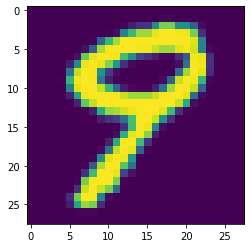

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 26
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_data_path = '/content/emnist-digits-train.csv'
test_data_path = '//content/emnist-digits-test.csv'

# Use python-mnist library to import pre-shuffled EMNIST letters into Pandas
train_data = pd.read_csv(train_data_path, header=None)
test_data = pd.read_csv(test_data_path, header=None)

# Extract values to create a list from pandas dataframe
train_data = train_data.values
test_data = test_data.values

print('\n[+] Manipulating test and training datasets')
# Extract labels and flatten into a 1D array - training data
y_train = train_data[:,:1]
y_train = np.array(list(map(lambda x: x-1, y_train.flatten())))
x_train = train_data[:,1:]
print(' > done extracting labels and flattening training data')

# Extract labels and flatten into a 1D array - test data
y_test = test_data[:,:1]
y_test = np.array(list(map(lambda x: x-1, y_test.flatten())))
x_test = test_data[:,1:]
print(' > done extracting labels and flattening test data')

# Transpose the data
x_train = np.array(list(map(lambda x: x.reshape(28,28).transpose() ,x_train)))
x_test = np.array(list(map(lambda x: x.reshape(28,28).transpose() ,x_test)))
print(' > transpose complete on test and training data')

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Show shape of training and test data
print(' > x_train shape   : {}'.format(x_train.shape))
print(' > x_test shape    : {}'.format(x_test.shape))
print(' > training samples: {}'.format(x_train.shape[0]))
print(' > testing samples : {}'.format(x_test.shape[0]))

# Show a test image that is 28x28
#plt.imshow(x_train[1].reshape(28,28), cmap='Greys_r')
plt.imshow(x_train[1].reshape(28,28))
print(' > showing test image')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [3]:
# Configure the model layers
# Use sequential model - a linear stack of layers
# Use 2D convolution layer - spatial convolution over images
# Use MaxPooling2D layer - max pooling operation for spatial data
# Use dense - regular densely-connected NN layer
# Use dropout to prevent overfitting - applies dropout to input using (relu activaton)
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape, name='conv2d1'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='maxpool1'))
model.add(Dropout(0.5))
model.add(Conv2D(64, (5, 5), activation='relu', name='conv2d2'))
model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool2'))
model.add(Flatten())
model.add(Dense(128, activation='relu', name='dense1'))
model.add(Dropout(0.2))

# Add a dense layer (softmax activation) - Output layer
model.add(Dense(num_classes, activation='softmax', name='preds'))

# Show a summary of the model
print('\n[+] Model Summary:')
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

print('\n[+] Model Performance:')
score = model.evaluate(x_train, y_train, verbose=0)
print(' > Train loss:', score[0])
print(' > Train accuracy:', score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print(' > Test loss:', score[0])
print(' > Test accuracy:', score[1])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

[+] Model Summary:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d1 (Conv2D)             (None, 24, 24, 32)        832       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d2 (Conv2D)             (None, 8, 8, 64)          51264     
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)     

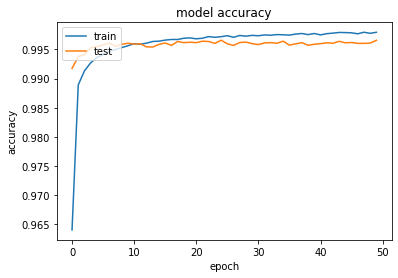

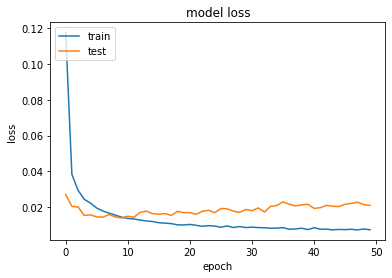


[+] Layer Details:
 > Conv2D Layer
 > MaxPool2D Layer
 > Dropout Layer
 > Conv2D Layer
 > MaxPool2D Layer
 > Dense Layer
 > Dense Layer - Output


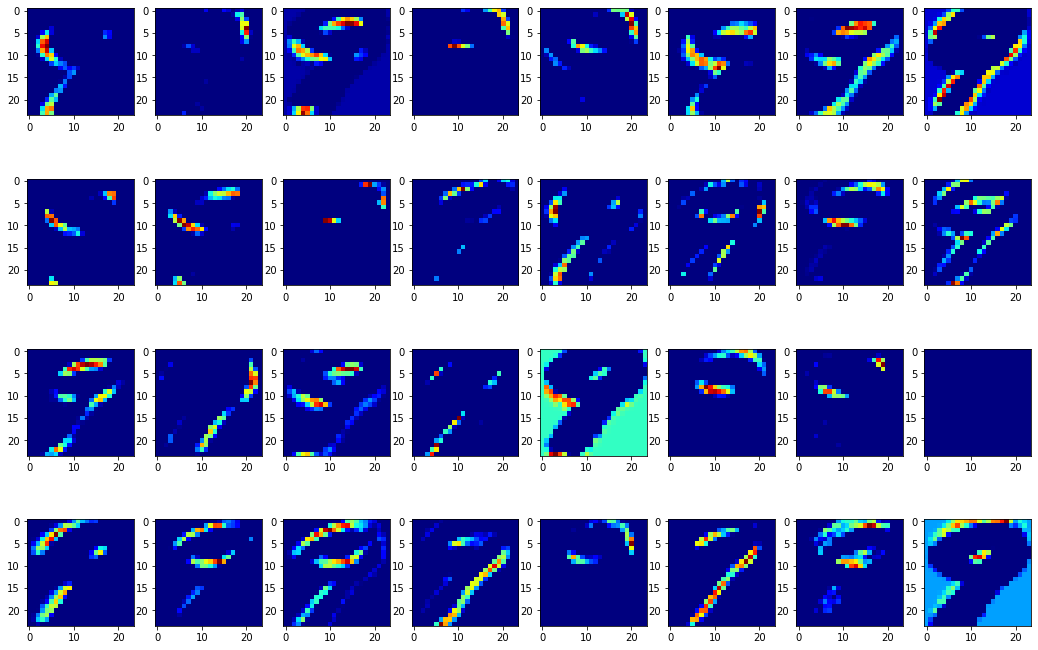

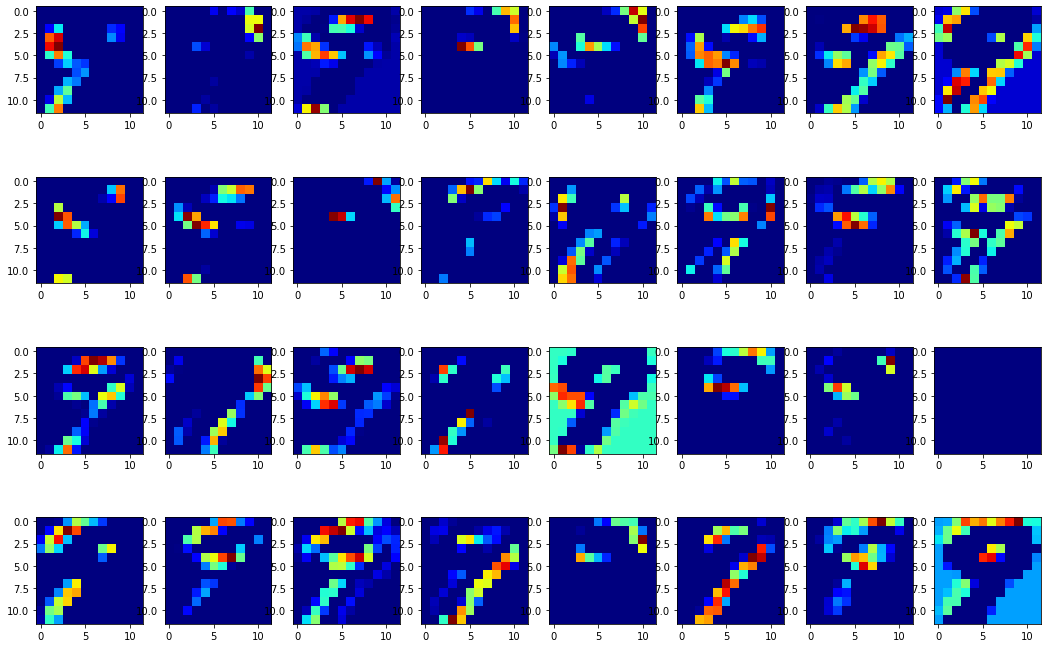

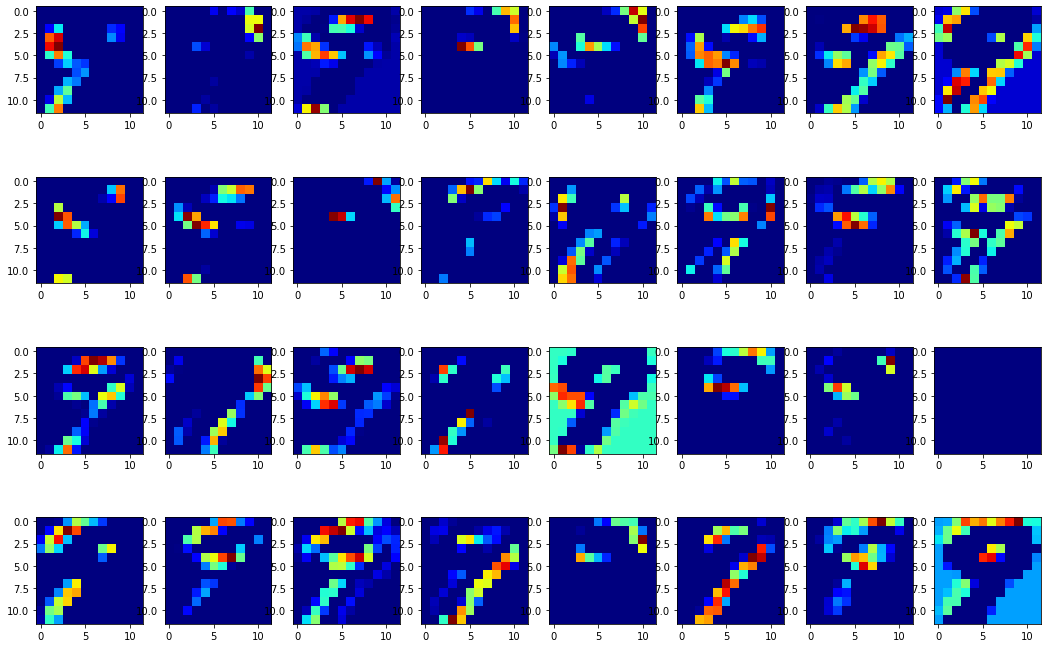

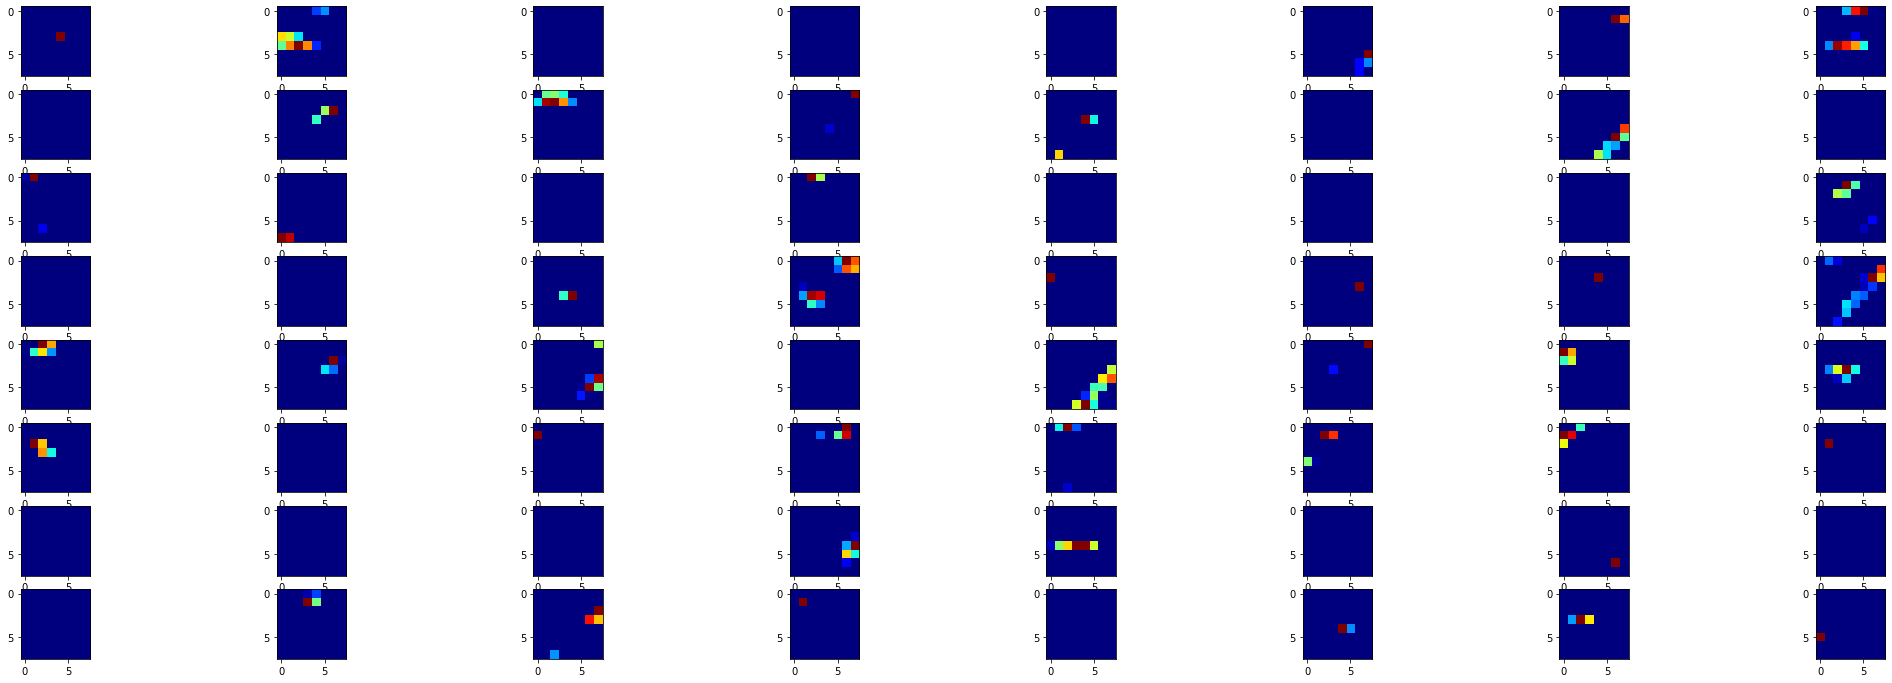

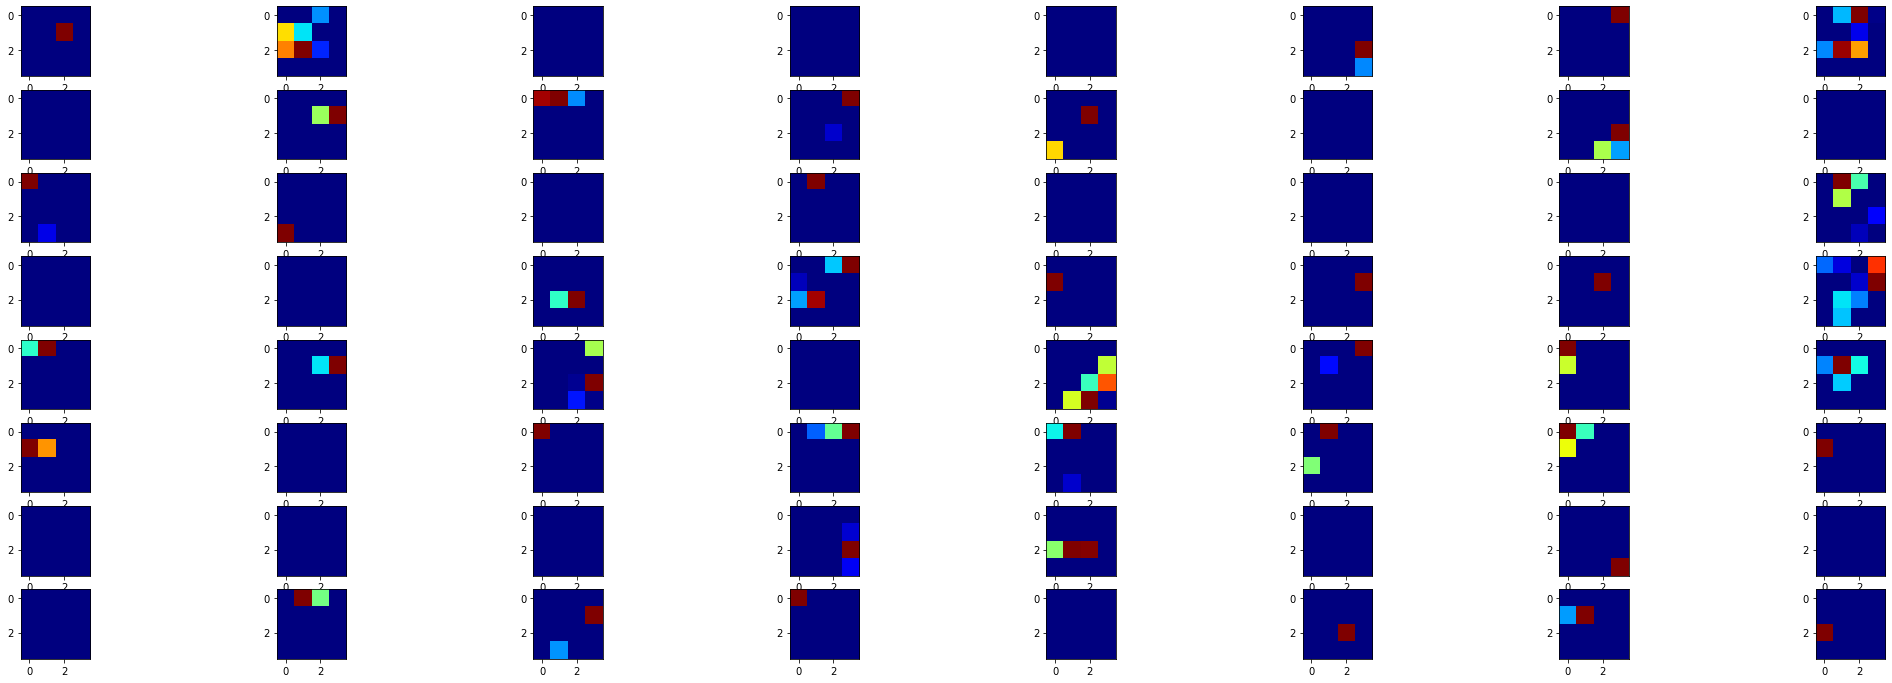

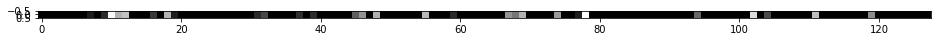

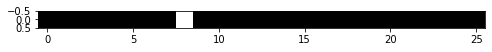

In [4]:
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Display visualizations for each layer in the CNN
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[1].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*4.5,col_size*1.5))
    for row in range(0,row_size): 
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='jet')
            activation_index += 1

# Show conv2d1 layer activations
print('\n[+] Layer Details:')
print(' > Conv2D Layer')
display_activation(activations, 8, 4, 0)

# Show maxpool1 layer activations
print(' > MaxPool2D Layer')
display_activation(activations, 8, 4, 1)

# Show dropout layer activations
print(' > Dropout Layer')
display_activation(activations, 8, 4, 2)

# Show conv2d2 layer activations
print(' > Conv2D Layer')
display_activation(activations, 8, 8, 3)

# Show maxpool2 layer activations
print(' > MaxPool2D Layer')
display_activation(activations, 8, 8, 4)

# Show Dense layer - post-flatten
print(' > Dense Layer')
fig, ax = plt.subplots(1, 1, figsize=(16,20))
ax.imshow(activations[6], cmap='gray')

# Show Dense layer activations - output layer
print(' > Dense Layer - Output')
fig, ax = plt.subplots(1, 1, figsize=(8,12))
ax.imshow(activations[8], cmap='gray')


In [0]:
predictions = model.predict_classes(x_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)


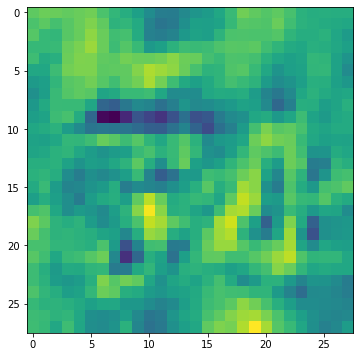

In [6]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (18, 6)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
filter_idx = 1
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])


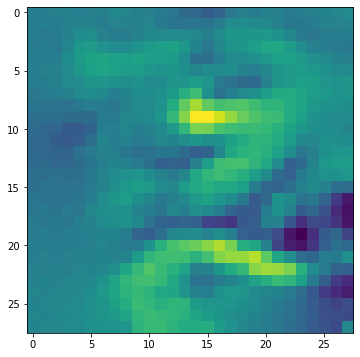

In [7]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.))
plt.imshow(img[..., 0])

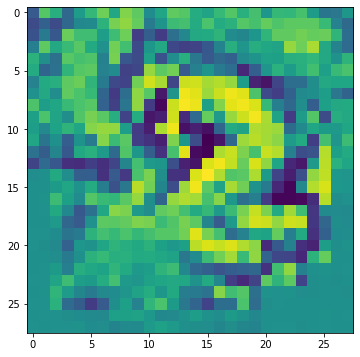

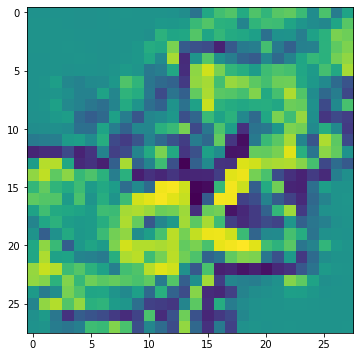

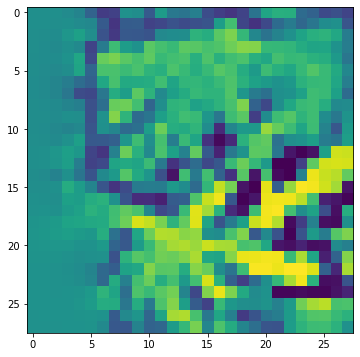

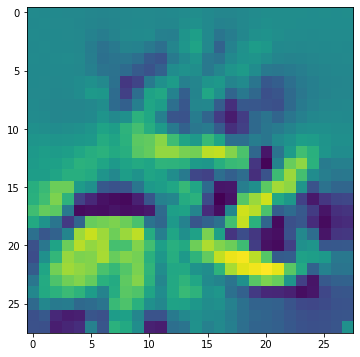

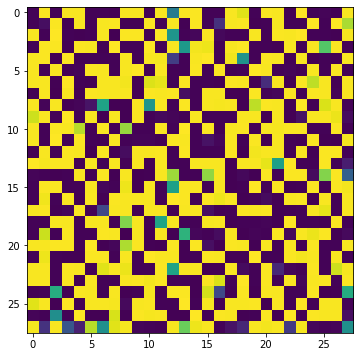

In [8]:
for tv_weight in [1e-3, 1e-2, 1e-1, 1, 10]:
    # Lets turn off verbose output this time to avoid clutter and just see the output.
    img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), 
                               tv_weight=tv_weight, lp_norm_weight=0.)
    plt.figure()
    plt.imshow(img[..., 0])

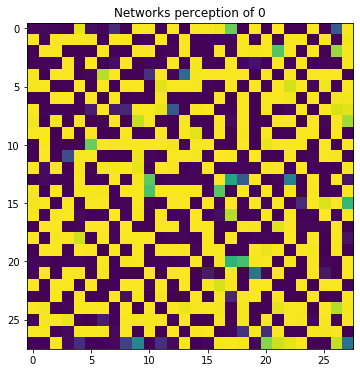

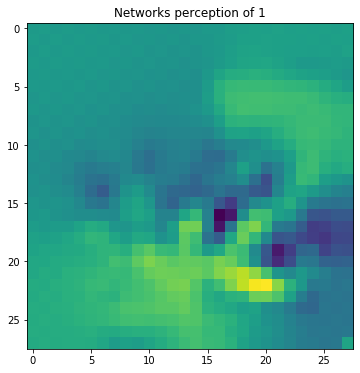

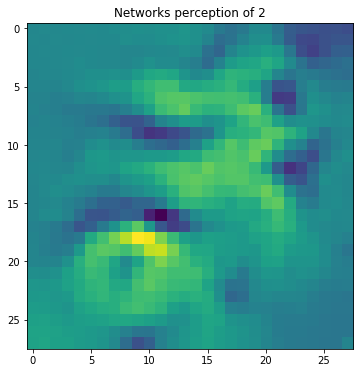

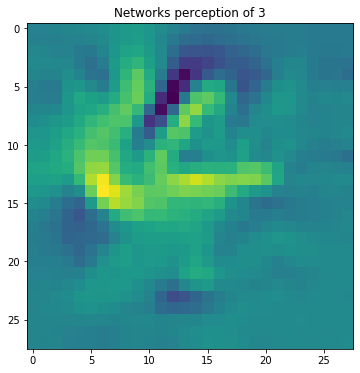

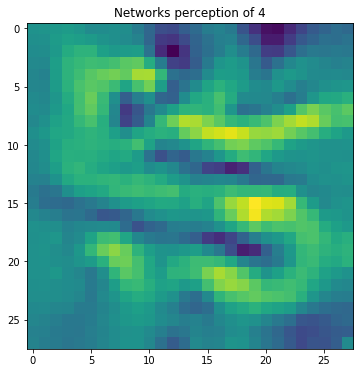

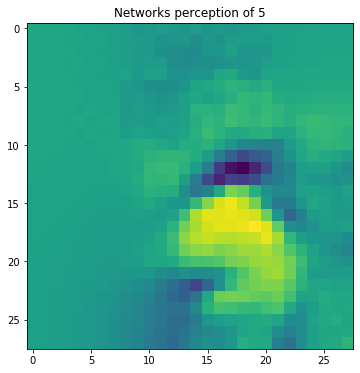

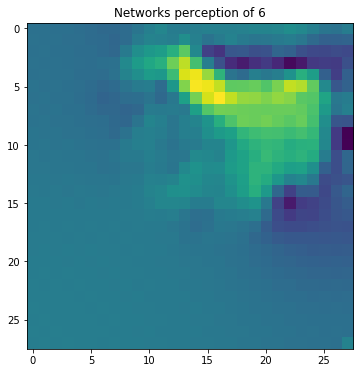

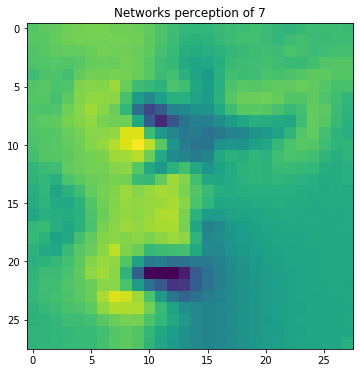

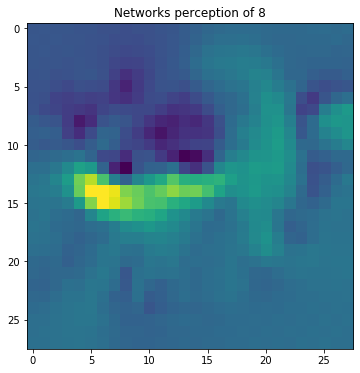

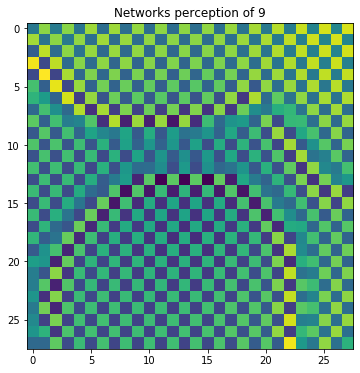

In [9]:
for output_idx in np.arange(10):
    # Lets turn off verbose output this time to avoid clutter and just see the output.
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Networks perception of {}'.format(output_idx))
    plt.imshow(img[..., 0])

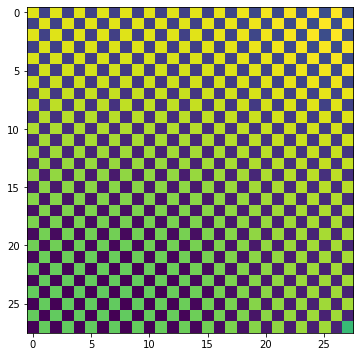

In [10]:
img = visualize_activation(model, layer_idx, filter_indices=[1, 10], input_range=(0., 1.))
plt.imshow(img[..., 0])

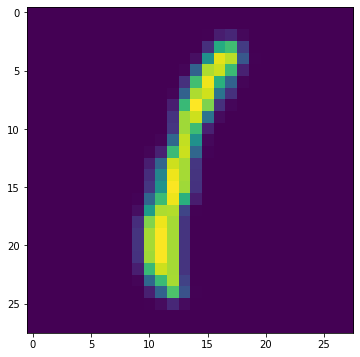

In [11]:
class_idx = 0
indices = np.where(y_test[:, class_idx] == 1.)[0]

# pick some random input from here.
idx = indices[0]

# Lets sanity check the picked image.
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (18, 6)
plt.imshow(x_test[idx][..., 0])

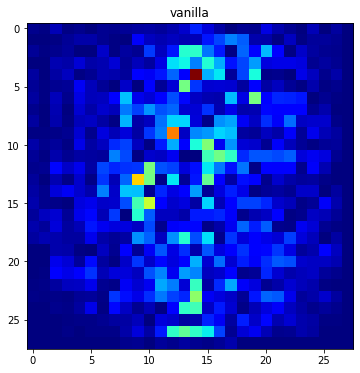

In [12]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=x_test[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.title('vanilla')
plt.imshow(grads, cmap='jet')

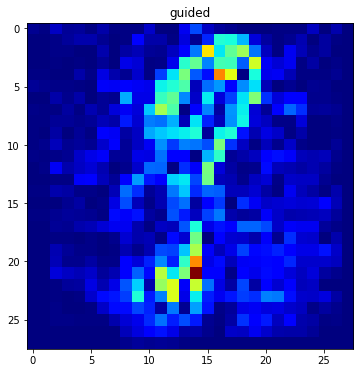

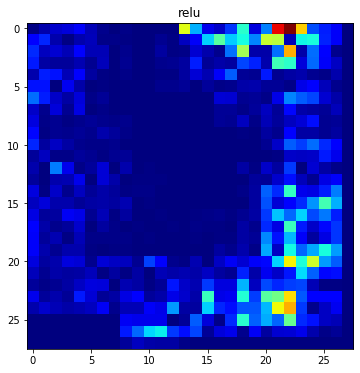

In [13]:
for modifier in ['guided', 'relu']:
    grads = visualize_saliency(model, layer_idx, filter_indices=class_idx,
                               seed_input=x_test[idx], backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

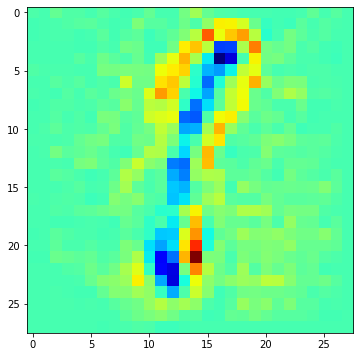

In [14]:
grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=x_test[idx], 
                           backprop_modifier='guided', grad_modifier='negate')
plt.imshow(grads, cmap='jet')

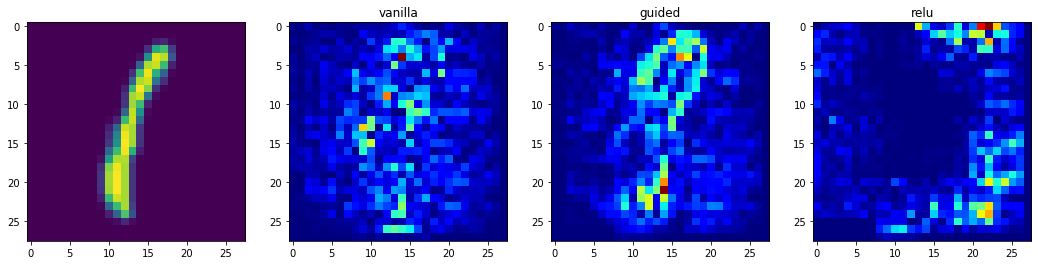

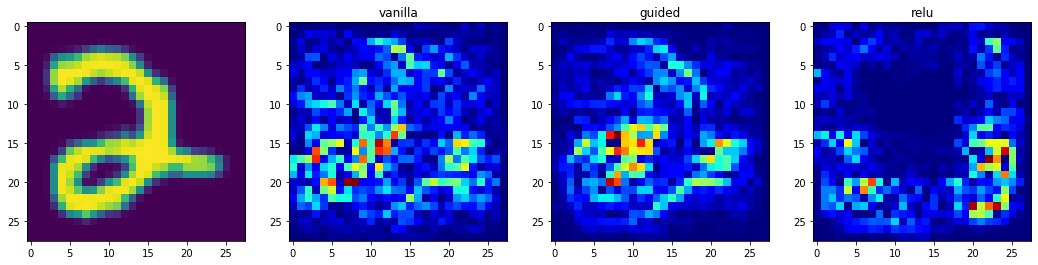

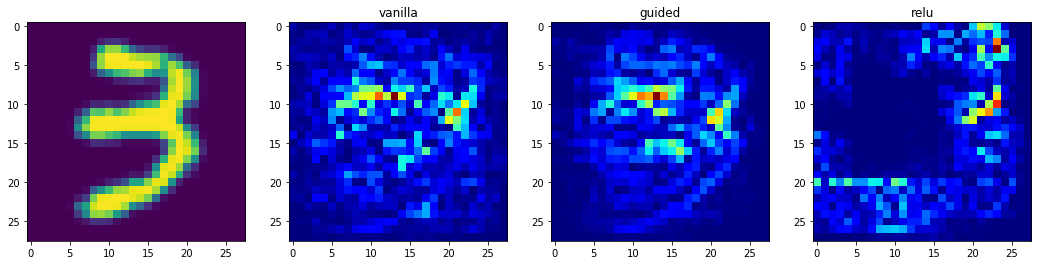

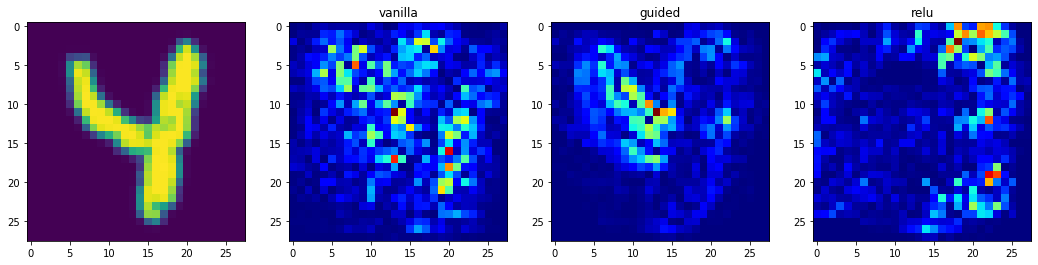

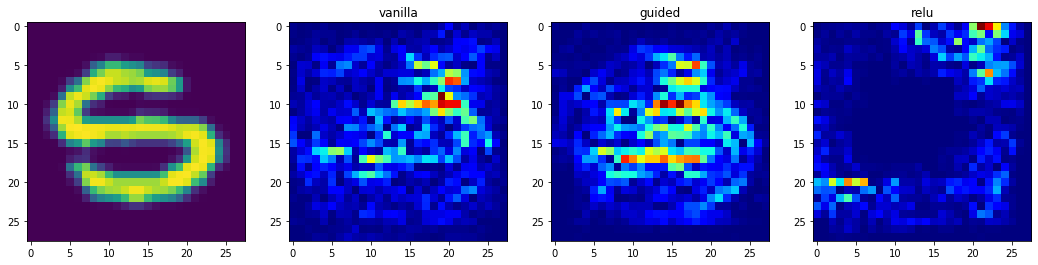

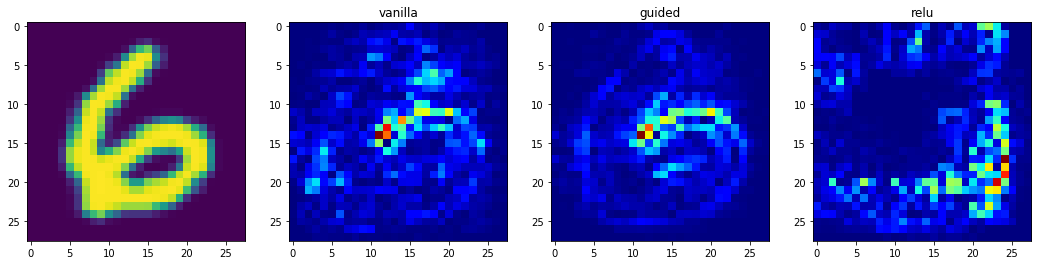

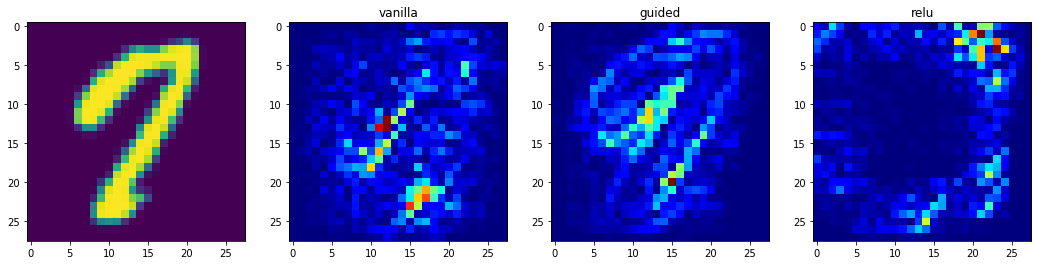

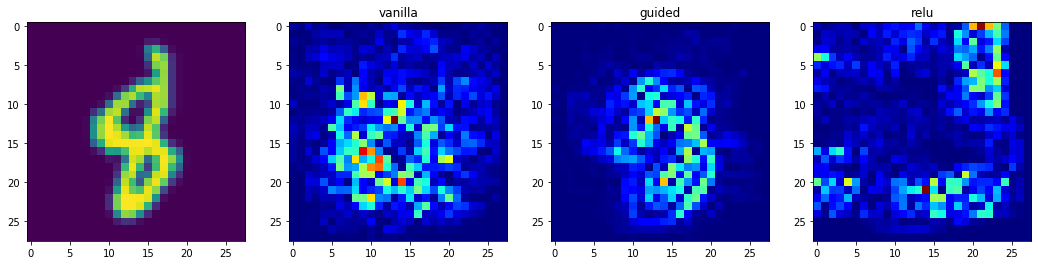

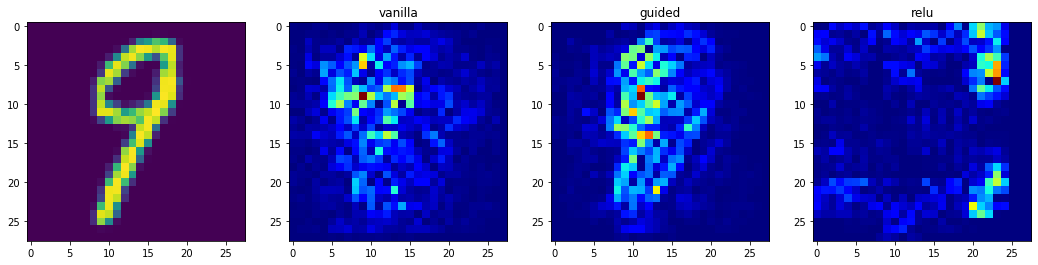

In [16]:
# This corresponds to the Dense linear layer.
for class_idx in np.arange(10):    
    try:
        indices = np.where(y_test[:, class_idx] == 1.)[0]
        idx = indices[0]

        f, ax = plt.subplots(1, 4)
        ax[0].imshow(x_test[idx][..., 0])
        
        for i, modifier in enumerate([None, 'guided', 'relu']):
            grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, 
                                    seed_input=x_test[idx], backprop_modifier=modifier)
            if modifier is None:
                modifier = 'vanilla'
            ax[i+1].set_title(modifier)    
            ax[i+1].imshow(grads, cmap='jet')
    except:
        continue

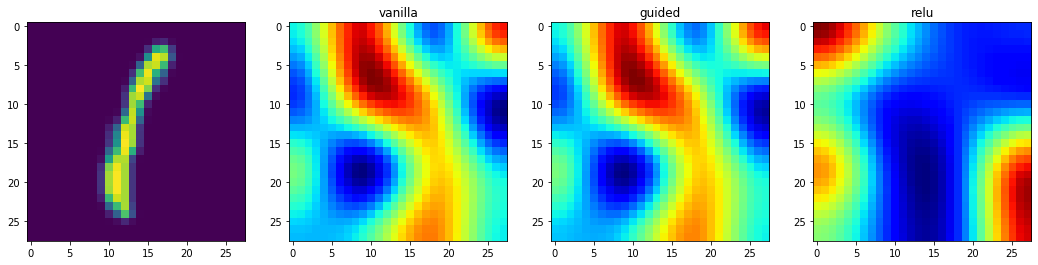

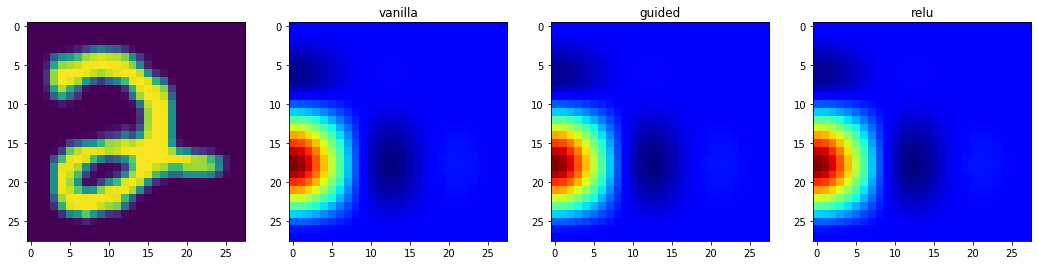

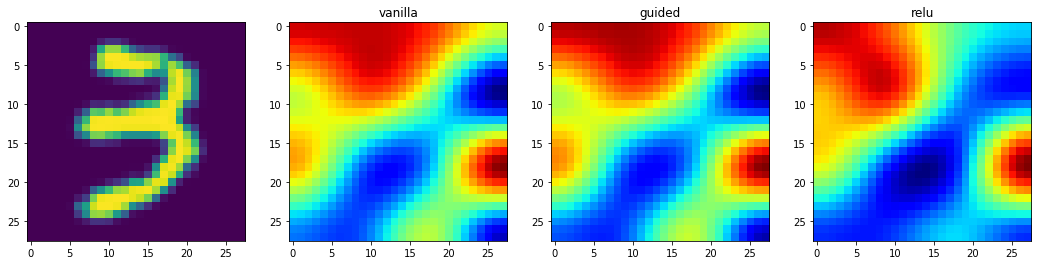

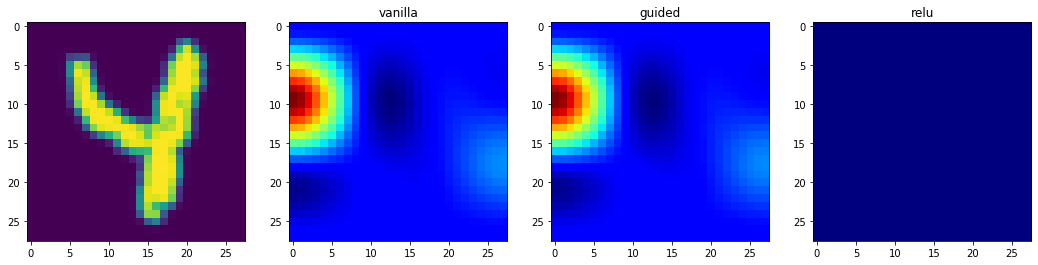

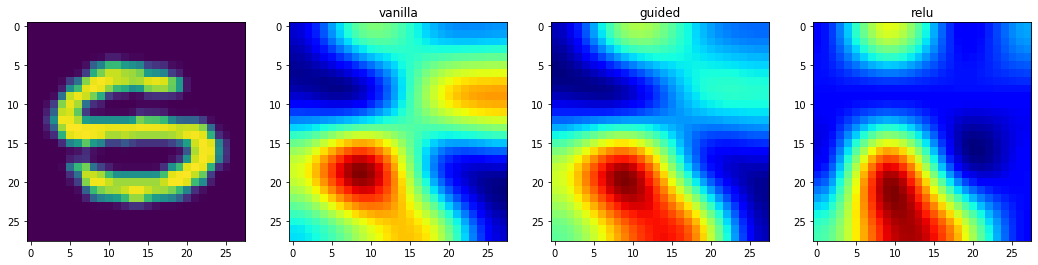

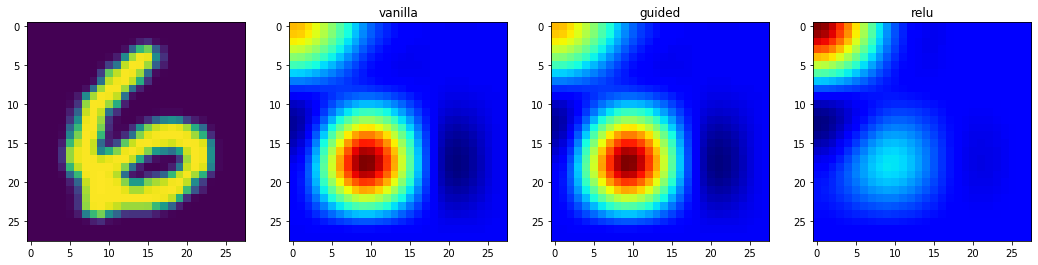

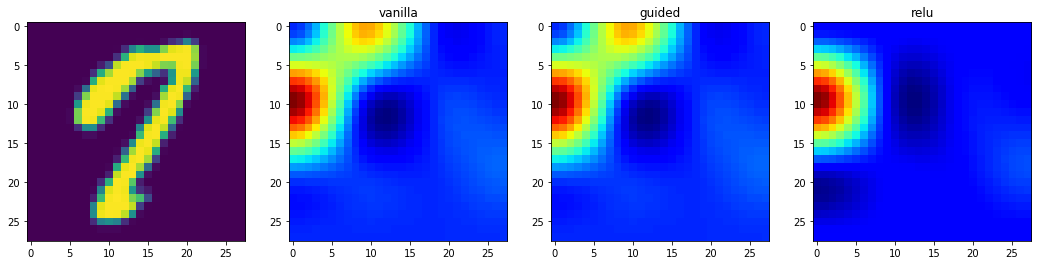

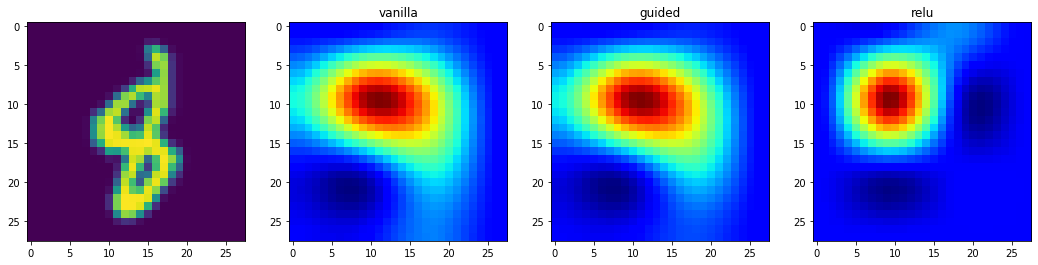

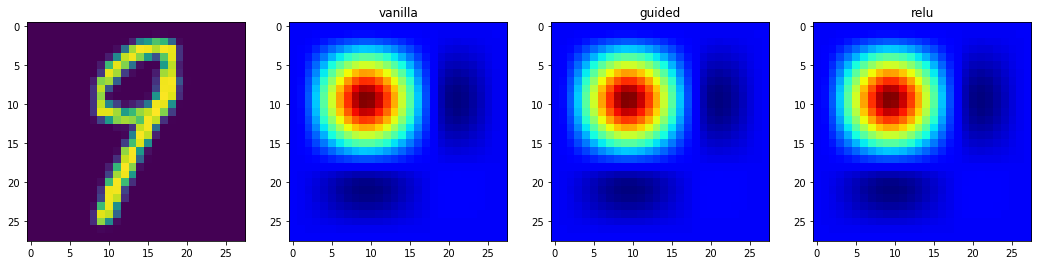

In [18]:
from vis.visualization import visualize_cam

# This corresponds to the Dense linear layer.
for class_idx in np.arange(10):    
    try:
        indices = np.where(y_test[:, class_idx] == 1.)[0]
        idx = indices[0]

        f, ax = plt.subplots(1, 4)
        ax[0].imshow(x_test[idx][..., 0])
        
        for i, modifier in enumerate([None, 'guided', 'relu']):
            grads = visualize_cam(model, layer_idx, filter_indices=class_idx, 
                                seed_input=x_test[idx], backprop_modifier=modifier)        
            if modifier is None:
                modifier = 'vanilla'
            ax[i+1].set_title(modifier)    
            ax[i+1].imshow(grads, cmap='jet')
    except:
        continue